# House Value Analysis

## Data Preprocessing

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('house_data.csv')

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Drop the unnecessary variables
df = df.drop(columns=['Id'])

### Feature Engineering

In [6]:
df['IsRemod'] = df['YearBuilt'] != df['YearRemodAdd']
remod_df = df[df['IsRemod'] == True]
unremod_df = df[df['IsRemod'] == False]

## EDA

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

### IsRemod and Sale Price

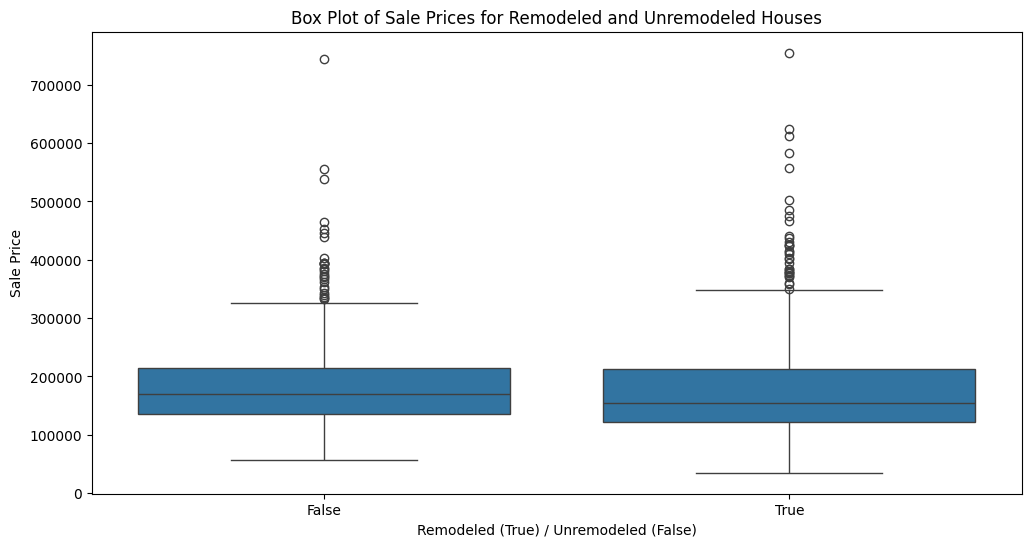

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='IsRemod', y='SalePrice', data=df)

plt.title('Box Plot of Sale Prices for Remodeled and Unremodeled Houses')
plt.xlabel('Remodeled (True) / Unremodeled (False)')
plt.ylabel('Sale Price')

plt.show()

Text(0, 0.5, 'Frequency')

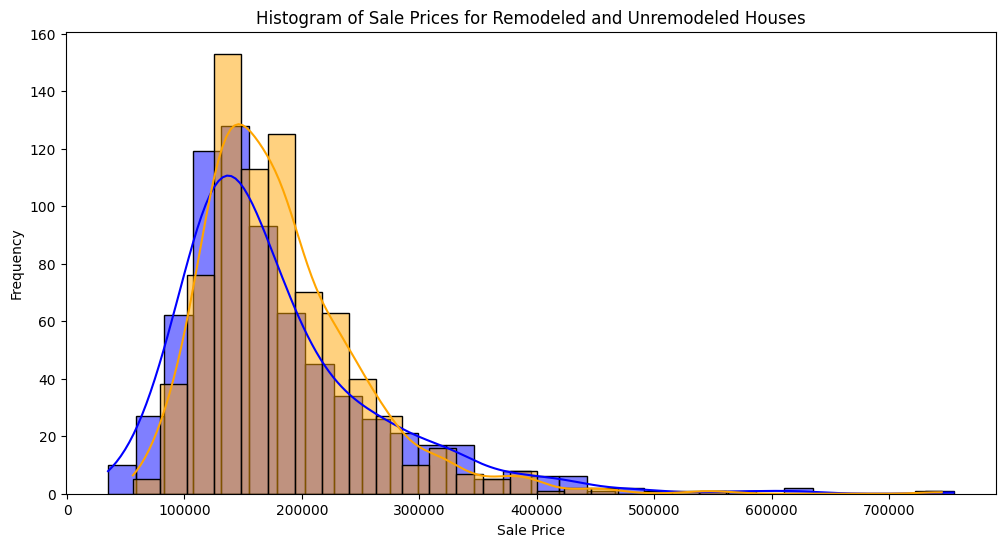

In [9]:
plt.figure(figsize=(12, 6))
sns.histplot(remod_df['SalePrice'], kde=True, color='blue', label='Remodeled Houses', bins=30)
sns.histplot(unremod_df['SalePrice'], kde=True, color='orange', label='Unremodeled Houses', bins=30)

plt.title('Histogram of Sale Prices for Remodeled and Unremodeled Houses')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')

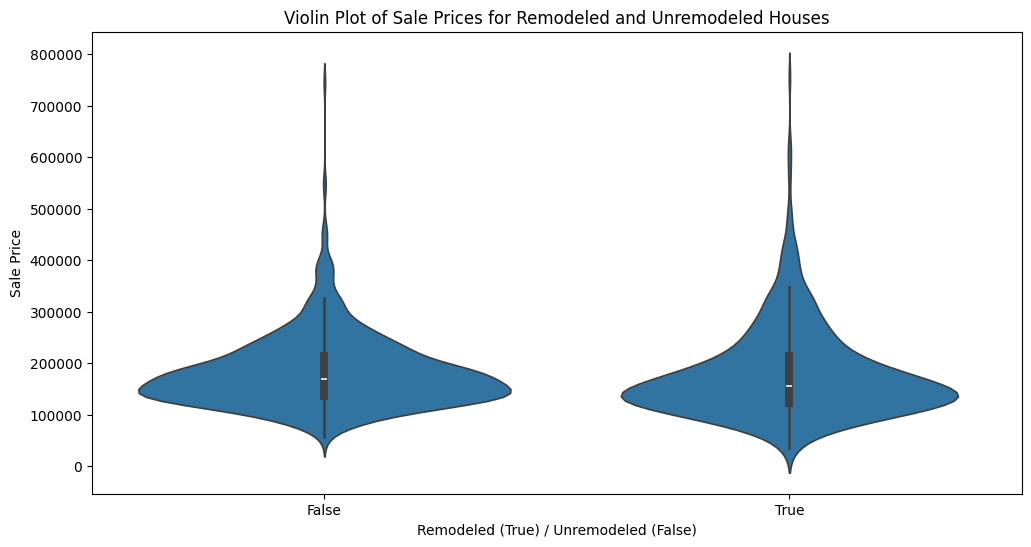

In [10]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='IsRemod', y='SalePrice', data=df)

plt.title('Violin Plot of Sale Prices for Remodeled and Unremodeled Houses')
plt.xlabel('Remodeled (True) / Unremodeled (False)')
plt.ylabel('Sale Price')

plt.show()

We can see that the sale price of remodeled houses is slightly higher than that of unremodeled houses.

### Correlation with Sale Price

#### Numerical Variables

In [11]:
num_df = df.select_dtypes(include=['int64', 'float64'])
num_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [12]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

In [13]:
# Drop unnecessary features
num_df = num_df.drop(columns=['MSSubClass'])
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1201 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   OverallQual    1460 non-null   int64  
 3   OverallCond    1460 non-null   int64  
 4   YearBuilt      1460 non-null   int64  
 5   YearRemodAdd   1460 non-null   int64  
 6   MasVnrArea     1452 non-null   float64
 7   BsmtFinSF1     1460 non-null   int64  
 8   BsmtFinSF2     1460 non-null   int64  
 9   BsmtUnfSF      1460 non-null   int64  
 10  TotalBsmtSF    1460 non-null   int64  
 11  1stFlrSF       1460 non-null   int64  
 12  2ndFlrSF       1460 non-null   int64  
 13  LowQualFinSF   1460 non-null   int64  
 14  GrLivArea      1460 non-null   int64  
 15  BsmtFullBath   1460 non-null   int64  
 16  BsmtHalfBath   1460 non-null   int64  
 17  FullBath       1460 non-null   int64  
 18  HalfBath

#### Handle Null Values

In [14]:
num_df['LotFrontage'] = num_df['LotFrontage'].fillna(0)

print(f"There is {num_df['LotFrontage'].isnull().sum()} null values.")

There is 0 null values.


In [15]:
num_df['MasVnrArea'] = num_df['MasVnrArea'].fillna(0)

print(f"There is {num_df['MasVnrArea'].isnull().sum()} null values.")

There is 0 null values.


In [16]:
num_df['GarageYrBlt'] = num_df['GarageYrBlt'].fillna(0)

print(f"There is {num_df['GarageYrBlt'].isnull().sum()} null values.")

There is 0 null values.


In [17]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   OverallQual    1460 non-null   int64  
 3   OverallCond    1460 non-null   int64  
 4   YearBuilt      1460 non-null   int64  
 5   YearRemodAdd   1460 non-null   int64  
 6   MasVnrArea     1460 non-null   float64
 7   BsmtFinSF1     1460 non-null   int64  
 8   BsmtFinSF2     1460 non-null   int64  
 9   BsmtUnfSF      1460 non-null   int64  
 10  TotalBsmtSF    1460 non-null   int64  
 11  1stFlrSF       1460 non-null   int64  
 12  2ndFlrSF       1460 non-null   int64  
 13  LowQualFinSF   1460 non-null   int64  
 14  GrLivArea      1460 non-null   int64  
 15  BsmtFullBath   1460 non-null   int64  
 16  BsmtHalfBath   1460 non-null   int64  
 17  FullBath       1460 non-null   int64  
 18  HalfBath

In [18]:
correlation_matrix = num_df.corr()
correlation_matrix

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
LotFrontage,1.000000,0.100739,0.176561,-0.053457,0.036853,0.078686,0.105010,0.076670,-0.009312,0.160829,...,-0.016780,0.069605,0.027366,0.023499,0.022969,0.114106,-0.059606,0.018942,-0.012094,0.209624
LotArea,0.100739,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.176561,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,0.308159,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.053457,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,-0.136841,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.036853,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.078686,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.105010,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,0.076670,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.009312,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,-0.209294,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
BsmtUnfSF,0.160829,-0.002618,0.308159,-0.136841,0.149040,0.181133,0.113862,-0.495251,-0.209294,1.000000,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479


In [19]:
correlation_with_saleprice = correlation_matrix['SalePrice'].sort_values(ascending=False)
print("Top features correlated with SalePrice: ")
print(correlation_with_saleprice.head(10))

Top features correlated with SalePrice: 
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


## Predict Post-Remodeling Value

### Linear Regression

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

#### Selecting Features

In [21]:
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'IsRemod']
X = df[features]
y = df['SalePrice']

#### Spilt the Data

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Train Linear Regression Model

In [23]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

#### Evaluate Model

In [24]:
lr_pred = lr_model.predict(X_test)
print("Linear Regression MAE: ", mean_absolute_error(y_test, lr_pred))

Linear Regression MAE:  25018.211176363053


### Fine-Tune with Ridge (L2) and Lasso (L1) Regression

In [25]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'IsRemod']
X = remod_df[features]
y = remod_df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print("Linear Regression MAE: ", mean_absolute_error(y_test, lr_pred))

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)
print("Ridge Regression MAE: ", mean_absolute_error(y_test, ridge_pred))

lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)
print("Lasso Regression MAE: ", mean_absolute_error(y_test, lasso_pred))

Linear Regression MAE:  26014.089330821353
Ridge Regression MAE:  26004.983147473187
Lasso Regression MAE:  26013.35625749595


Here, we can see that the MAE of the Ridge Regression is the smallest, so we will be using it for further prediction.

#### Simulate Post-Remodeling Values for Unremodeled Houses

In [26]:
# Create a Copy of the Unremodeled DataFrame
unremod_df = df[df['IsRemod'] == False].copy()

In [27]:
# Use '.loc' to Set Values
unremod_df.loc[:, 'OverallQual'] = unremod_df['OverallQual'] + 1  # Increment 'OverallQual' by 1 for improved quality
unremod_df.loc[:, 'YearRemodAdd'] = unremod_df['YrSold'] - 1  # Assume remodeling happens one year before sale

# Display the updated DataFrame
print(unremod_df[['OverallQual', 'YearRemodAdd']].head())

    OverallQual  YearRemodAdd
0             8          2007
1             7          2006
4             9          2007
7             8          2008
10            6          2007


#### Create New Feature Set for Improved Houses

In [28]:
X_improved = unremod_df[features]

#### Predict Improved Prices Using Ridge Regression Model

In [29]:
unremod_df['PredictedImprovedPrice'] = ridge_model.predict(X_improved)
unremod_df['PriceIncrease'] = unremod_df['PredictedImprovedPrice'] - unremod_df['SalePrice']

print(unremod_df[['PredictedImprovedPrice', 'SalePrice', 'PriceIncrease']].head())

    PredictedImprovedPrice  SalePrice  PriceIncrease
0            240869.596233     208500   32369.596233
1            195103.832702     181500   13603.832702
4            311898.653772     250000   61898.653772
7            255183.056964     200000   55183.056964
10           153827.676090     129500   24327.676090

#### Identify House with Highest Potential Increase

In [30]:
highest_potential_house = unremod_df.loc[unremod_df['PriceIncrease'].idxmax()]
print("House with highest potential increase in value after remodeling: ")
print(highest_potential_house)

House with highest potential increase in value after remodeling: 
MSSubClass                           60
MSZoning                             RL
LotFrontage                       313.0
LotArea                           63887
Street                             Pave
                              ...      
SaleCondition                   Partial
SalePrice                        160000
IsRemod                           False
PredictedImprovedPrice    760283.764372
PriceIncrease             600283.764372
Name: 1298, Length: 83, dtype: object


### Random Forests Regressor

#### Sample using Default Random Forest Model

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Selecting Features
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']
X = df[features]
y = df['SalePrice']

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the Model
rf_pred = rf_model.predict(X_test)
print("Random Forest MAE: ", mean_absolute_error(y_test, rf_pred))

# Simulate Post-Remodeling Values for Unremodeled Houses
unremod_df = df[df['IsRemod'] == False].copy()  # Create a Copy of the Unremodeled DataFrame
unremod_df.loc[:, 'OverallQual'] = unremod_df['OverallQual'] + 1
unremod_df.loc[:, 'YearRemodAdd'] = unremod_df['YrSold'] - 1

# Create New Feature Set for Improved Houses
X_improved = unremod_df[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']]
unremod_df['PredictedImprovedPrice'] = rf_model.predict(X_improved)
unremod_df['PriceIncrease'] = unremod_df['PredictedImprovedPrice'] - unremod_df['SalePrice']

# Identify House with Highest Potential Increase
highest_potential_house = unremod_df.loc[unremod_df['PriceIncrease'].idxmax()]
print("House with highest potential increase in value after remodeling: ")
print(highest_potential_house)

Random Forest MAE:  19033.5179264514
House with highest potential increase in value after remodeling: 
MSSubClass                       20
MSZoning                         RL
LotFrontage                    85.0
LotArea                       11900
Street                         Pave
                            ...    
SaleCondition                Family
SalePrice                     82500
IsRemod                       False
PredictedImprovedPrice    250965.12
PriceIncrease             168465.12
Name: 632, Length: 83, dtype: object


#### Fine-Tune using Grid Seach CV and Randomized Search CV

In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np

# Selecting Features
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']
X = df[features]
y = df['SalePrice']

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4], 
    'max_features': ['sqrt', 'log2', None]
}

# Define a wider parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(100, 1000, num=10)],
    'max_depth': [None] + [int(x) for x in np.linspace(10, 110, num=11)],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize the default Random Forest, GridSearchCV and RandomizedSearchCV object
rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
random_search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42), param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Fit the default model, grid and random search to the data
rf_model.fit(X_train, y_train)
grid_search.fit(X_train, y_train)
random_search.fit(X_train, y_train)

# Get the best model
best_grid_rf_model = grid_search.best_estimator_
best_random_rf_model = random_search.best_estimator_

# Predict on the test data
rf_pred = rf_model.predict(X_test)
best_grid_rf_pred = best_grid_rf_model.predict(X_test)
best_random_rf_pred = best_random_rf_model.predict(X_test)

# Evaluate the model
default_rf_mae = mean_absolute_error(y_test, rf_pred)
best_grid_rf_mae = mean_absolute_error(y_test, best_grid_rf_pred)
best_random_rf_mae = mean_absolute_error(y_test, best_random_rf_pred)
print("Default Random Forest MAE: ", default_rf_mae)
print("Best Random Forest MAE (Grid Search CV): ", best_grid_rf_mae)
print("Best Hyperparameters: ", grid_search.best_params_)
print('Best Random Forest MAE (Randomized Search CV):', best_random_rf_mae)
print('Best Hyperparameters:', random_search.best_params_)

Fitting 3 folds for each of 324 candidates, totalling 972 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Default Random Forest MAE:  19033.5179264514
Best Random Forest MAE (Grid Search CV):  19042.379188274626
Best Hyperparameters:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Random Forest MAE (Randomized Search CV): 19127.629374859433
Best Hyperparameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 110}


#### Check if model is overfitting

In [33]:
from sklearn.metrics import mean_absolute_error, r2_score

models = [rf_model, best_grid_rf_model, best_random_rf_model]

models_dict = {
    rf_model: 'Default Random Forest', 
    best_grid_rf_model: 'Random Forest (Grid Search CV)', 
    best_random_rf_model: 'Random Forest (Randomized Search CV)'
}

for model in models:
    # Evaluate the model on the training set
    train_pred = model.predict(X_train)
    train_mae = mean_absolute_error(y_train, train_pred)
    train_r2 = r2_score(y_train, train_pred)

    # Evaluate the model on the test set
    test_pred = model.predict(X_test)
    test_mae = mean_absolute_error(y_test, test_pred)
    test_r2 = r2_score(y_test, test_pred)

    print(f"Training MAE: {train_mae}")
    print(f"Test MAE: {test_mae}")
    print(f"Training R^2: {train_r2}")
    print(f"Test R^2: {test_r2}")

    # Check for overfitting
    if train_mae < test_mae:
        print(f"The {models_dict[model]} might be overfitting. ")
    else:
        print(f"The {models_dict[model]} is not overfitting. ")
    print()

Training MAE: 7496.151192983528
Test MAE: 19033.5179264514
Training R^2: 0.974668874157078
Test R^2: 0.8856242714556324
The Default Random Forest might be overfitting. 

Training MAE: 7258.263864028413
Test MAE: 19042.379188274626
Training R^2: 0.9769278308427596
Test R^2: 0.8849802497718948
The Random Forest (Grid Search CV) might be overfitting. 

Training MAE: 10594.084791737241
Test MAE: 19127.629374859433
Training R^2: 0.946061596116459
Test R^2: 0.8724077951189568
The Random Forest (Randomized Search CV) might be overfitting. 



#### Plotting Learning Curves

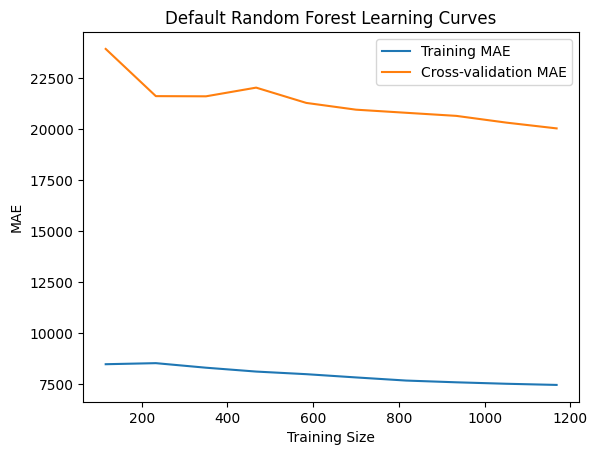

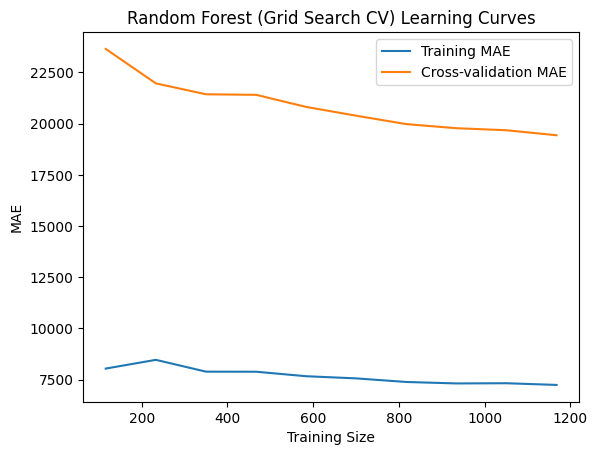

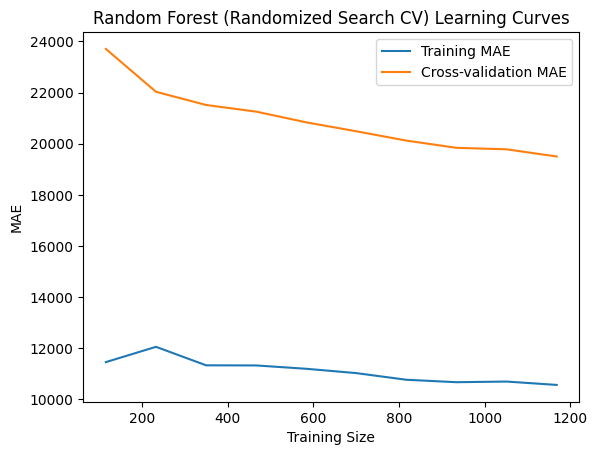

In [34]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

models = [rf_model, best_grid_rf_model, best_random_rf_model]

models_dict = {
    rf_model: 'Default Random Forest', 
    best_grid_rf_model: 'Random Forest (Grid Search CV)', 
    best_random_rf_model: 'Random Forest (Randomized Search CV)'
}

for model in models:
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)

    plt.figure()
    plt.plot(train_sizes, train_scores_mean, label='Training MAE')
    plt.plot(train_sizes, test_scores_mean, label='Cross-validation MAE')
    plt.xlabel('Training Size')
    plt.ylabel('MAE')
    plt.title(f'{models_dict[model]} Learning Curves')
    plt.legend()
    plt.show()

From the above, both the metrics and learning curves indicate that the model is overfitting.

#### Evaluate Feature Importance

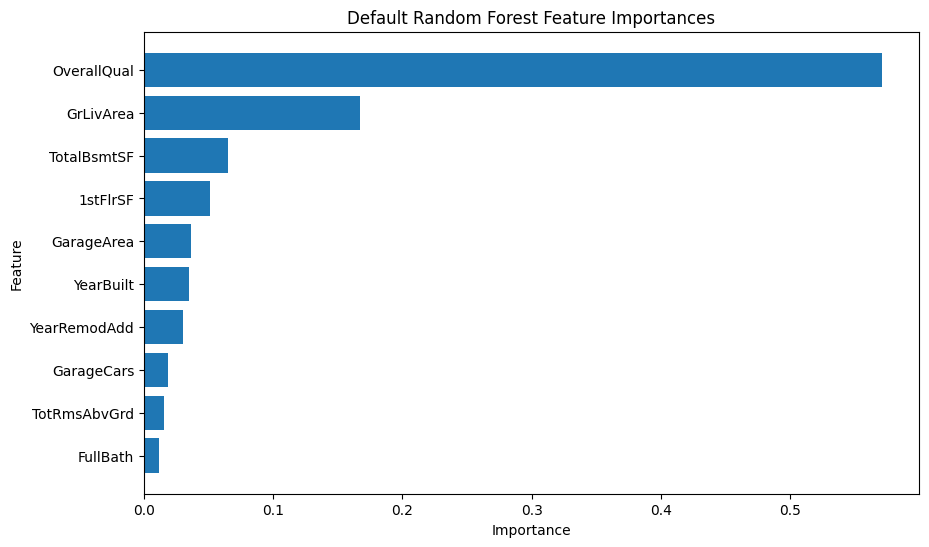

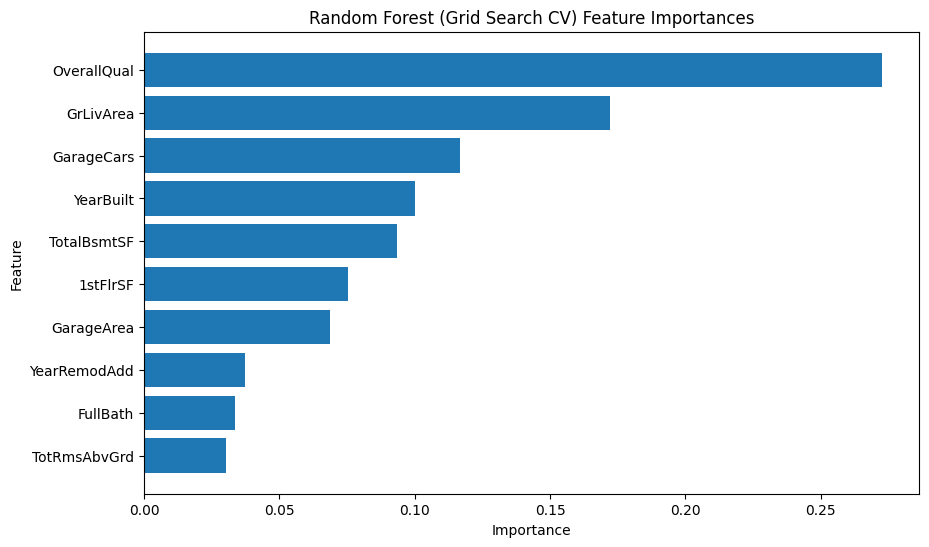

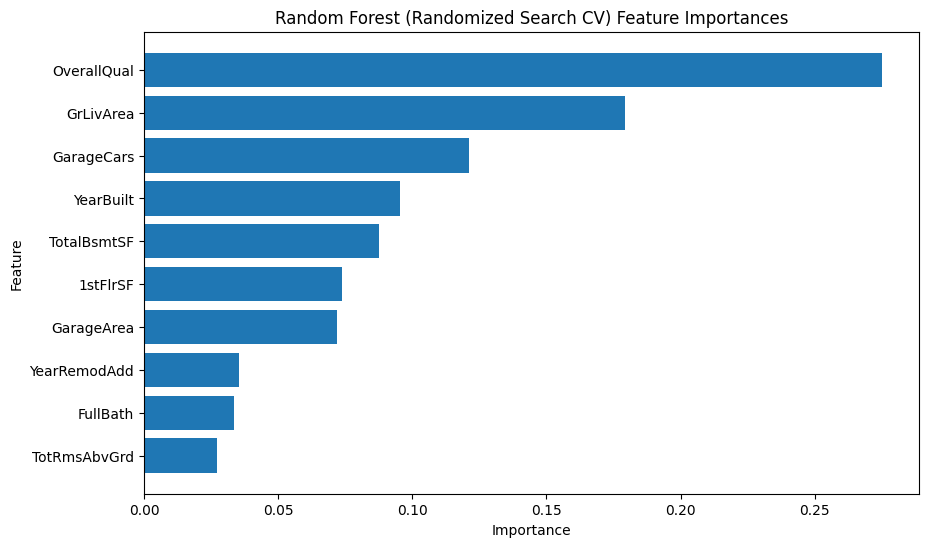

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

models = [rf_model, best_grid_rf_model, best_random_rf_model]

models_dict = {
    rf_model: 'Default Random Forest', 
    best_grid_rf_model: 'Random Forest (Grid Search CV)', 
    best_random_rf_model: 'Random Forest (Randomized Search CV)'
}

for model in models:
    # Get feature importances from the model
    feature_importances = model.feature_importances_

    # Create a DataFrame for visualization
    features_df = pd.DataFrame({
        'Feature': features,
        'Importance': feature_importances
    })

    # Sort the features by importance
    features_df = features_df.sort_values(by='Importance', ascending=False)

    # Plot feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(features_df['Feature'], features_df['Importance'])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(f'{models_dict[model]} Feature Importances')
    plt.gca().invert_yaxis()
    plt.show()

From the above graphs, we should remove irrelevant or less important features that might be adding noise to the model.

#### Removing Noise for Each Model

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np

# Default Model
features = ['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']
X = df[features]
y = df['SalePrice']

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize the default Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Fit the default model to the data
rf_model.fit(X_train, y_train)

# Predict on the train data
rf_train_pred = rf_model.predict(X_train)

# Predict on the test data
rf_test_pred = rf_model.predict(X_test)

# Evaluate the model
rf_train_mae = mean_absolute_error(y_train, rf_train_pred)
rf_test_mae = mean_absolute_error(y_test, rf_test_pred)
print("Default Random Forest Train MAE: ", rf_train_mae)
print("Default Random Forest Test MAE: ", rf_test_mae)

Default Random Forest Train MAE:  8040.043675738312
Default Random Forest Test MAE:  25135.67819429372


In [37]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np

# Grid Search CV
features = ['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'YearBuilt']
X = df[features]
y = df['SalePrice']

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4], 
    'max_features': ['sqrt', 'log2', None]
}

# Initialize GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=43), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best model
best_grid_rf_model = grid_search.best_estimator_

# Predict on the train data
best_grid_rf_train_pred = best_grid_rf_model.predict(X_train)

# Predict on test data
best_grid_rf_test_pred = best_grid_rf_model.predict(X_test)

# Evaluate the model
best_grid_rf_train_mae = mean_absolute_error(y_train, best_grid_rf_train_pred)
best_grid_rf_test_mae = mean_absolute_error(y_test, best_grid_rf_test_pred)
print("Best Random Forest Train MAE (Grid Search CV): ", best_grid_rf_train_mae)
print("Best Random Forest Test MAE (Grid Search CV): ", best_grid_rf_test_mae)
print("Best Hyperparameters: ", grid_search.best_params_)

Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best Random Forest Train MAE (Grid Search CV):  11858.6728166688
Best Random Forest Test MAE (Grid Search CV):  21264.37358850719
Best Hyperparameters:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [38]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np

# Selecting Features for Randomized Search CV
features = ['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'YearBuilt']
X = df[features]
y = df['SalePrice']

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a wider parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(100, 1000, num=10)],
    'max_depth': [None] + [int(x) for x in np.linspace(10, 110, num=11)],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42), param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Get the best model
best_random_rf_model = random_search.best_estimator_

# Predict on the train data
best_random_rf_train_pred = best_random_rf_model.predict(X_train)

# Predict on the test data
best_random_rf_test_pred = best_random_rf_model.predict(X_test)

# Evaluate the model
best_random_rf_train_mae = mean_absolute_error(y_train, best_random_rf_train_pred)
best_random_rf_test_mae = mean_absolute_error(y_test, best_random_rf_test_pred)
print('Best Random Forest Train MAE (Randomized Search CV):', best_random_rf_train_mae)
print('Best Random Forest Test MAE (Randomized Search CV):', best_random_rf_test_mae)
print('Best Hyperparameters:', random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Random Forest Train MAE (Randomized Search CV): 11749.206478004995
Best Random Forest Test MAE (Randomized Search CV): 19801.122560435753
Best Hyperparameters: {'n_estimators': 800, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 70}


#### Further Prediction

In [39]:
# Choose the final model
lowest_mae = min(rf_test_mae, best_grid_rf_test_mae, best_random_rf_test_mae)
if lowest_mae == rf_test_mae:
    final_model = rf_model
    print("Using default Random Forest model for further predictions. ")
elif lowest_mae == best_grid_rf_test_mae:
    final_model = best_grid_rf_model
    print("Using Best Random Forest model (Grid Search CV) for further predictions. ")
elif lowest_mae == best_random_rf_test_mae:
    final_model = best_random_rf_model
    print("Using Best Random Forest model (Random Search CV) for further predictions. ")

# Simulate Post-Remodeling Values for Unremodeled Houses
unremod_df = df[df['IsRemod'] == False].copy()  # Create a Copy of the Unremodeled DataFrame
unremod_df.loc[:, 'OverallQual'] = unremod_df['OverallQual'] + 1
unremod_df.loc[:, 'YearRemodAdd'] = unremod_df['YrSold'] - 1

# Create New Feature Set for Improved Houses
X_improved = unremod_df[features]
unremod_df['PredictedImprovedPrice'] = final_model.predict(X_improved)
unremod_df['PriceIncrease'] = unremod_df['PredictedImprovedPrice'] - unremod_df['SalePrice']

# Identify House with Highest Potential Increase
highest_potential_house = unremod_df.loc[unremod_df['PriceIncrease'].idxmax()]
print("House with highest potential increase in value after remodeling: ")
print(highest_potential_house)

Using Best Random Forest model (Random Search CV) for further predictions. 
House with highest potential increase in value after remodeling: 
MSSubClass                           60
MSZoning                             RL
LotFrontage                       313.0
LotArea                           63887
Street                             Pave
                              ...      
SaleCondition                   Partial
SalePrice                        160000
IsRemod                           False
PredictedImprovedPrice    333944.317566
PriceIncrease             173944.317566
Name: 1298, Length: 83, dtype: object


### Gradient Boosting Machine (GBM)

#### Sample

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']
X = df[features]
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbm_model = GradientBoostingRegressor(random_state=42)
gbm_model.fit(X_train, y_train)

gbm_pred = gbm_model.predict(X_test)
print("GBM MAE: ", mean_absolute_error(y_test, gbm_pred))

GBM MAE:  19123.365396079553


#### Fine-Tune using Grid and Randomized Search CV

Fitting 3 folds for each of 2187 candidates, totalling 6561 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits


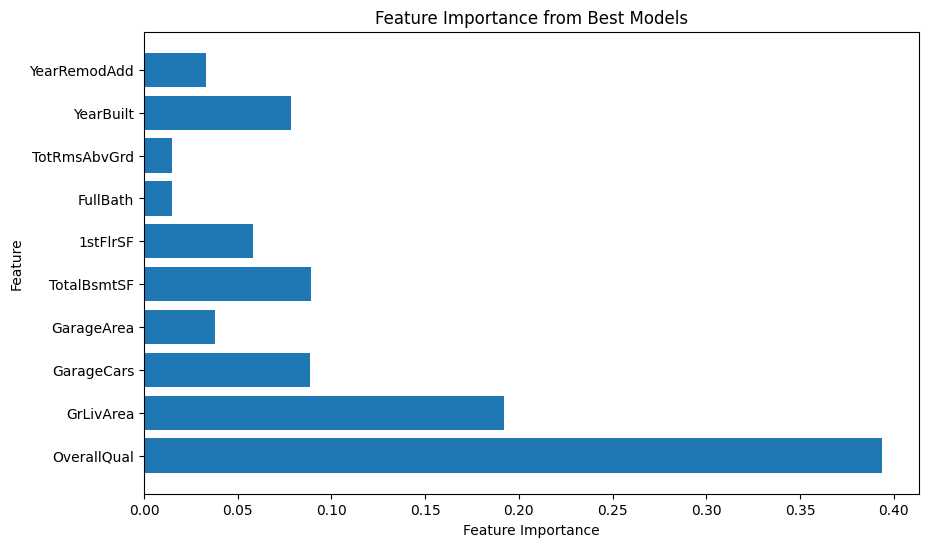

In [41]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']
X = df[features]
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300], 
    'learning_rate': [0.01, 0.05, 0.1], 
    'max_depth': [3, 4, 5], 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.8, 1.0],
    'max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

param_dist = {
    'n_estimators': [int(x) for x in np.linspace(100, 1000, num=10)],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'subsample': [0.6, 0.8, 1.0],
    'max_features': ['sqrt', 'log2', None]
}

random_search = RandomizedSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_distributions=param_dist, n_iter=100, cv=3, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

grid_importances = grid_search.best_estimator_.feature_importances_
random_importances = random_search.best_estimator_.feature_importances_

importances = (grid_importances + random_importances) / 2
feature_names = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance from Best Models")
plt.show()

important_features = [feature for feature, importance in zip(feature_names, importances) if importance > 0.01]
X_train_reduced = X_train[important_features]
X_test_reduced = X_test[important_features]

In [42]:
grid_search_reduced = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_reduced.fit(X_train_reduced, y_train)

random_search_reduced = RandomizedSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_distributions=param_dist, n_iter=100, cv=3, n_jobs=-1, verbose=2, random_state=42)
random_search_reduced.fit(X_train_reduced, y_train)

best_params_grid = grid_search_reduced.best_params_
best_params_random = random_search_reduced.best_params_

final_model = GradientBoostingRegressor(**best_params_grid, random_state=42)
final_model.fit(X_train_reduced, y_train)

Fitting 3 folds for each of 2187 candidates, totalling 6561 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits


GradientBoostingRegressor(learning_rate=0.05, random_state=42)

In [46]:
train_pred = final_model.predict(X_train_reduced)
train_mae = mean_absolute_error(y_train, train_pred)
print(f"Train MAE: {train_mae}")

test_pred = final_model.predict(X_test_reduced)
test_mae = mean_absolute_error(y_test, test_pred)
print(f"Test MAE: {test_mae}")

Train MAE: 15912.36049819355
Test MAE: 19028.123792094186


#### Further Prediction

In [44]:
unremod_df = df[df['IsRemod'] == False].copy()
unremod_df.loc[:, 'OverallQual'] = unremod_df['OverallQual'] + 1
unremod_df.loc[:, 'YearRemodAdd'] = unremod_df['YrSold'] - 1

X_improved = unremod_df[important_features]

unremod_df['PredictedImprovedPrice'] = final_model.predict(X_improved)

unremod_df['PriceIncrease'] = unremod_df['PredictedImprovedPrice'] - unremod_df['SalePrice']

highest_potential_house = unremod_df.loc[unremod_df['PriceIncrease'].idxmax()]
print("House with highest potential increase in value after remodeling: ")
print(highest_potential_house)

House with highest potential increase in value after remodeling: 
MSSubClass                           20
MSZoning                             RL
LotFrontage                        85.0
LotArea                           11900
Street                             Pave
                              ...      
SaleCondition                    Family
SalePrice                         82500
IsRemod                           False
PredictedImprovedPrice    241173.303864
PriceIncrease             158673.303864
Name: 632, Length: 83, dtype: object


### XGBoost

#### Sample

In [48]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd']
X = df[features]
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)

xgb_pred = xgb_model.predict(X_test)
print("XGBoost MAE: ", mean_absolute_error(y_test, xgb_pred))

XGBoost MAE:  18951.117307898116


#### Fine-Tune using Grid and Randomized Search CV

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits


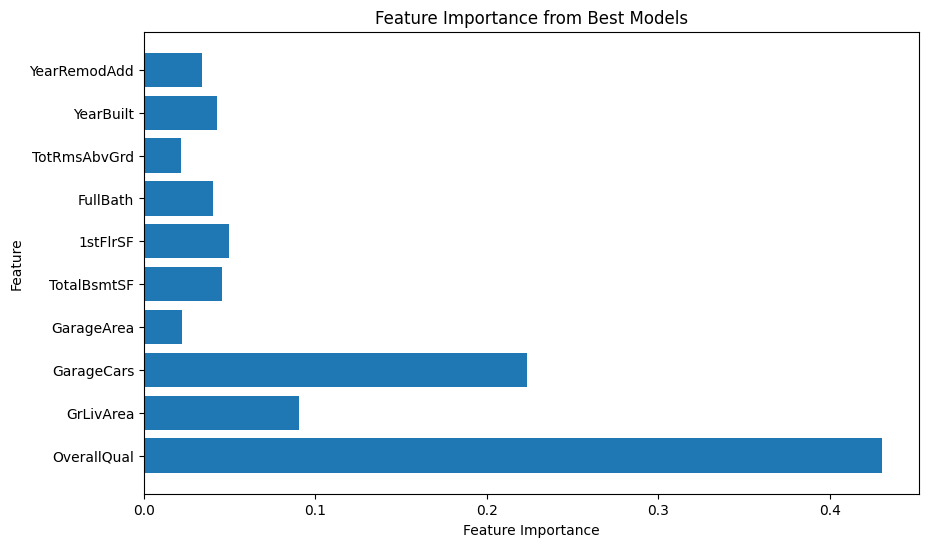

In [49]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']
X = df[features]
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300], 
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5], 
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

grid_search = GridSearchCV(estimator=XGBRegressor(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

param_dist = {
    'n_estimators': [int(x) for x in np.linspace(100, 1000, num=10)],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5, 6, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

random_search = RandomizedSearchCV(estimator=XGBRegressor(random_state=42), param_distributions=param_dist, n_iter=100, cv=3, n_jobs=-1, verbose=42, random_state=42)
random_search.fit(X_train, y_train)

grid_importances = grid_search.best_estimator_.feature_importances_
random_importances = random_search.best_estimator_.feature_importances_

importances = (grid_importances + random_importances) / 2
feature_names = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance from Best Models")
plt.show()

In [50]:
important_features = [feature for feature, importance in zip(feature_names, importances) if importance > 0.01]
X_train_reduced = X_train[important_features]
X_test_reduced = X_test[important_features]

In [51]:
grid_search_reduced = GridSearchCV(estimator=XGBRegressor(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_reduced.fit(X_train_reduced, y_train)

random_search_reduced = RandomizedSearchCV(estimator=XGBRegressor(random_state=42), param_distributions=param_dist, n_iter=100, cv=3, n_jobs=-1, verbose=2, random_state=42)
random_search_reduced.fit(X_train_reduced, y_train)

best_params_grid = grid_search_reduced.best_params_
best_params_random = random_search_reduced.best_params_

final_model = XGBRegressor(**best_params_grid, random_state=42)
final_model.fit(X_train_reduced, y_train)

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

#### Further Prediction

In [52]:
unremod_df = df[df['IsRemod'] == False].copy()
unremod_df.loc[:, 'OverallQual'] = unremod_df['OverallQual'] + 1
unremod_df.loc[:, 'YearRemodAdd'] = unremod_df['YrSold'] - 1

X_improved = unremod_df[important_features]

unremod_df['PredictedImprovedPrice'] = final_model.predict(X_improved)
unremod_df['PriceIncrease'] = unremod_df['PredictedImprovedPrice'] - unremod_df['SalePrice']

highest_potential_house = unremod_df.loc[unremod_df['PriceIncrease'].idxmax()]
print("House with highest potential increase in value after remodeling: ")
print(highest_potential_house)

House with highest potential increase in value after remodeling: 
MSSubClass                           20
MSZoning                             RL
LotFrontage                        85.0
LotArea                           11900
Street                             Pave
                              ...      
SaleCondition                    Family
SalePrice                         82500
IsRemod                           False
PredictedImprovedPrice    249223.890625
PriceIncrease             166723.890625
Name: 632, Length: 83, dtype: object


## Conclusion

### Models and Results

1. **Linear Regression**:
   - **House ID:** 1298
   - **Sale Price:** 160,000
   - **Predicted Improved Price:** 760,283.76
   - **Price Increase:** 600,283.76

2. **Random Forest**:
   - **House ID:** 1298
   - **Sale Price:** 160,000
   - **Predicted Improved Price:** 333,944.32
   - **Price Increase:** 173,944.32

3. **Gradient Boosting Machine (GBM)**:
   - **House ID:** 632
   - **Sale Price:** 82,500
   - **Predicted Improved Price:** 241,173.30
   - **Price Increase:** 158,673.30

4. **XGBoost**:
   - **House ID:** 632
   - **Sale Price:** 82,500
   - **Predicted Improved Price:** 249,223.89
   - **Price Increase:** 166,723.89

### Observations

1. **Consistency Between Linear Regression and Random Forest**:
   - Both models identified the same house (ID: 1298) as having the highest potential increase in value after remodeling.
   - However, the predicted increase in value varies significantly, with Linear Regression predicting a much higher increase compared to Random Forest.

2. **Consistency Between GBM and XGBoost**:
   - Both models identified the same house (ID: 632) as having the highest potential increase in value after remodeling.
   - The predicted increase in value is relatively close between GBM and XGBoost, with XGBoost predicting a slightly higher increase.

3. **Differences Between Model Groups**:
   - Linear Regression and Random Forest tend to agree on the same house, whereas GBM and XGBoost agree on a different house.
   - The magnitude of the predicted price increases varies considerably across models, indicating differences in how each model captures the relationships in the data.

### Interpretation

1. **Model Characteristics**:
   - **Linear Regression**: Tends to produce a higher predicted increase, likely due to its assumption of linear relationships between features and the target variable. It may not capture complex interactions as effectively as tree-based models.
   - **Random Forest**: Provides a more conservative estimate compared to Linear Regression. It benefits from averaging multiple decision trees, which helps in capturing non-linear interactions but might be prone to underestimating extreme values.
   - **GBM and XGBoost**: Both models identified the same house and provided similar estimates, suggesting that boosting algorithms may be better at capturing subtle patterns in the data. The close predictions between GBM and XGBoost highlight their similarity in approach and effectiveness.

2. **Reliability of Predictions**:
   - The significant variance in predicted increases between models suggests that while they can identify potential high-value targets, the exact estimates should be interpreted with caution.
   - Models like GBM and XGBoost, which are typically more robust in handling complex data, may provide more reliable predictions for such tasks.

### Conclusion

Given the results, it is evident that different models can yield varying predictions for the same task. Linear models like Linear Regression may overestimate the potential increase due to their simplicity, while ensemble methods like Random Forest and boosting methods like GBM and XGBoost provide more nuanced and potentially more reliable estimates.

For practical purposes, it might be beneficial to consider the predictions from multiple models and perhaps average them or use them in combination with domain knowledge to make the final decision on remodeling investments. Additionally, further validation with external data or more sophisticated ensemble methods could enhance the reliability of the predictions.